# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *9장 합성곱 신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### LAB 9-1 합성곱을 구현해 보자

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 

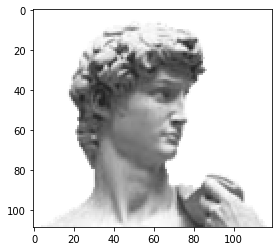

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

plt.imshow(img)  # 아래는 david.png 뿐 아니라 book.png도 로드한 결과임

In [ ]:
img.shape

(109, 120, 4)

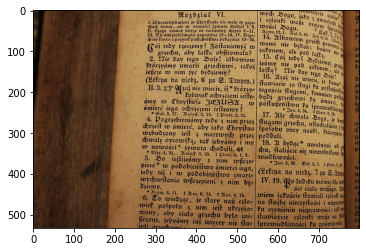

In [ ]:
# 책에는 아래 URL이 없으나 그림은 나타나 있음
url = 'https://github.com/dknife/ML/raw/main/data/image/book.png'
img = mpimg.imread(url)

plt.imshow(img)  # 아래는 david.png 뿐 아니라 book.png도 로드한 결과임

In [ ]:
# 다비드 그림을 사용하자
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

def padding(image, p_size):    # 넘파이의 pad 함수를 이용한 패딩 구현
    padded_img = np.pad(
                   array = image,
                   pad_width = ((p_size,p_size), (p_size,p_size), (0,0)),
                   mode = 'constant', constant_values = 0)
    return padded_img

(113, 124, 4)

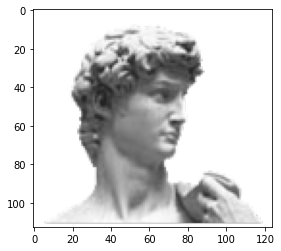

In [ ]:
padded = padding(img, 2)
plt.imshow(padded)
padded.shape

In [ ]:
box_filter = np.array(
   [[1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]])

In [ ]:
def apply_filter(small_region, filter) :
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

In [ ]:
def convolution(img, filter):
   r, c, channels = img.shape
   rp, cp = filter.shape
   th_r, th_c = (rp-1)//2 , (cp-1)//2
  
   start = np.array([ th_r, th_c ])
   end = np.array([r, c]) - start
   print(start, end, rp, cp)
   conv_img = np.zeros( (r - th_r*2, c - th_c*2, channels) )

   for channel in range(channels):
       for i in range(start[0], end[0]):
           for j in range(start[1], end[1]):
               conv_img[i-th_r, j-th_c, channel] = apply_filter(
                       img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel], 
                       filter)
   return conv_img

[1 1] [112 123] 3 3


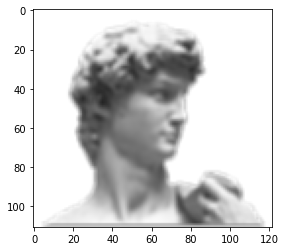

In [ ]:
conv_img = convolution(padded, box_filter)
plt.imshow(conv_img)

[1 1] [112 123] 3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


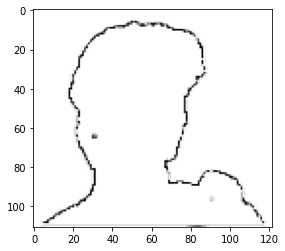

In [ ]:
laplacian = np.array(
   [[1, 0, 1],
    [0, -4, 0],
    [1, 0, 1],    ])
conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

[1 1] [112 123] 3 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


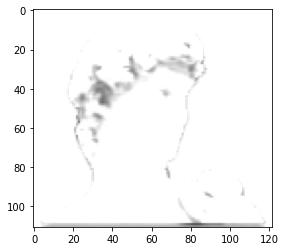

In [ ]:
unknown = np.random.rand(3, 3)

conv_img = convolution(padded, unknown)
np.clip(conv_img, 0, 255)
plt.imshow(conv_img)

### 9-7 합성곱 신경망 모델의 구성

In [ ]:
# 부분코드로 실행되지 않음 - 참고용 코드
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (64, 64, 3), 
                        kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding='same' filters = 64),
    … ])

SyntaxError: ignored

### LAB 9-2 : 합성곱 신경망으로 패션 MNIST 분류를 개선하기

In [1]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [3]:
train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

In [4]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', 
                        filters = 32),
     keras.layers.MaxPooling2D((2, 2), strides=2),
     keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, 
                    epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7696 - accuracy: 0.7305 - val_loss: 0.4510 - val_accuracy: 0.8357
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3876 - accuracy: 0.8612 - val_loss: 0.3624 - val_accuracy: 0.8795
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3166 - accuracy: 0.8875 - val_loss: 0.3621 - val_accuracy: 0.8723
Epoch 4/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2825 - accuracy: 0.8991 - val_loss: 0.3357 - val_accuracy: 0.8810
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2703 - accuracy: 0.9033 - val_loss: 0.2852 - val_accuracy: 0.9009


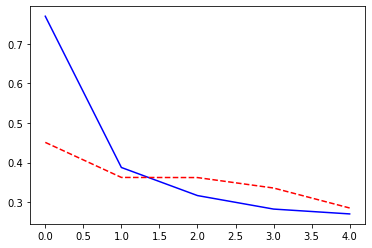

In [9]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

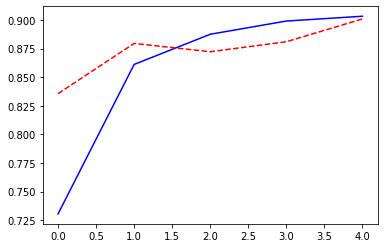

In [10]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.2951 - accuracy: 0.8974
테스트 정확도: 0.8974000215530396


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)

[0 0 6 7 5 0 2 5 9 4 8 0 6 4 6 2 9 3 7 7 1 4 4 0 5]


In [ ]:
def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                        figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images: break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(28,28)
         if n_rows>1: axis = ax[i, j]
         else: axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = class_names[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, cmap='gray', interpolation='nearest')

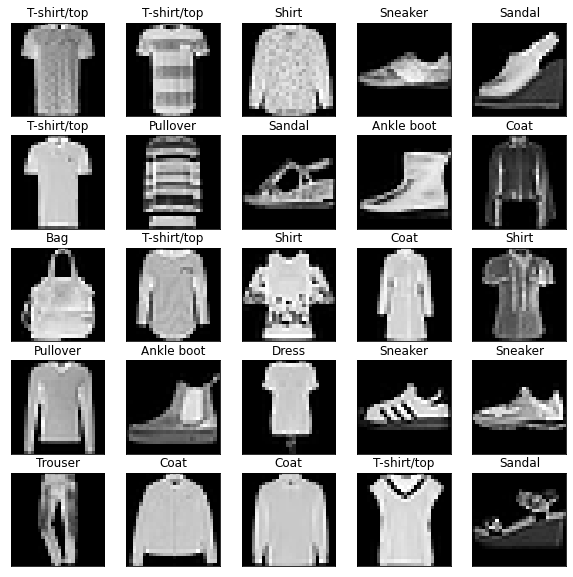

In [ ]:
plot_images(images, predictions, images_per_row = 5)

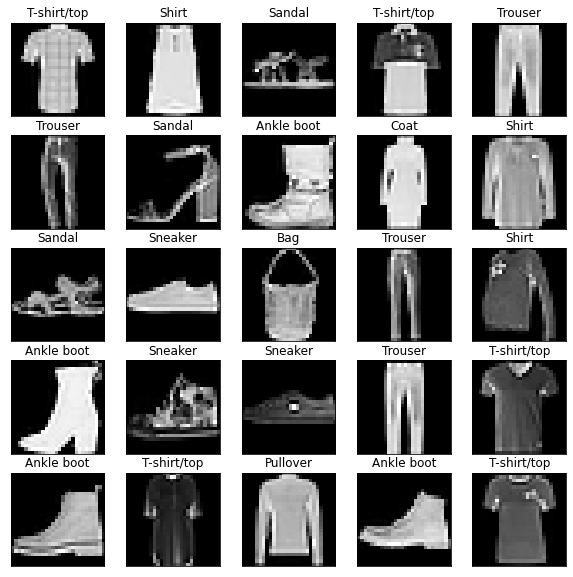

In [ ]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row = 5)

### LAB 9-3: 고급 CNN을 가져다 써보자.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers 
from keras.models import Model, load_model 
import pandas as pd
from keras.optimizers import RMSprop

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 훈련데이터는 10000개, 검증 데이터는 2000개만 사용
x_train, x_test = x_train[:10000] / 255.0, x_test[:2000] / 255.0
y_train, y_test = y_train[:10000], y_test[:2000]

In [ ]:
x_train_preprocess = np.zeros((x_train.shape[0], 75, 75, 3), 
                              dtype=np.float32)
print(x_train_preprocess.shape)
# 훈련 데이터 각각의 크기를 75x75로 변형 (인셉션 모델의 최소 크기)
for i, img in enumerate(x_train):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_train_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

(10000, 75, 75, 3)


In [ ]:
x_test_preprocess = np.zeros((x_test.shape[0], 75, 75, 3), 
                             dtype=np.float32)
print(x_test_preprocess.shape)
# 검증 데이터 각각의 크기를 75x75로 변형 (인셉션모델 최소 입력 크기)
for i, img in enumerate(x_test):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_test_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

(2000, 75, 75, 3)


In [ ]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                              include_top=False,
                              weights=None)
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_376 (Conv2D)             (None, 37, 37, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_376 (BatchN (None, 37, 37, 32)   96          conv2d_376[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 37, 37, 32)   0           batch_normalization_376[0][0]    
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(10, activation='sigmoid')(x)

In [ ]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_preprocess, y_train, epochs=20, 
                    validation_data=(x_test_preprocess, y_test))

Epoch 1/20
313/313 [==============================] - 24s 53ms/step - loss: 3.5581 - accuracy: 0.5635 - val_loss: 6.8621 - val_accuracy: 0.3710
Epoch 2/20
313/313 [==============================] - 15s 48ms/step - loss: 0.2621 - accuracy: 0.9330 - val_loss: 0.6173 - val_accuracy: 0.8850
Epoch 3/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1787 - accuracy: 0.9566 - val_loss: 2.2728 - val_accuracy: 0.8250
Epoch 4/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1080 - accuracy: 0.9753 - val_loss: 1.5368 - val_accuracy: 0.8510
Epoch 5/20
313/313 [==============================] - 15s 48ms/step - loss: 0.1245 - accuracy: 0.9706 - val_loss: 22.3185 - val_accuracy: 0.8880
Epoch 6/20
313/313 [==============================] - 15s 48ms/step - loss: 0.0959 - accuracy: 0.9801 - val_loss: 0.1394 - val_accuracy: 0.9730
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 0.0729 - accuracy: 0.9795 - val_loss: 0.1089 - val_accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

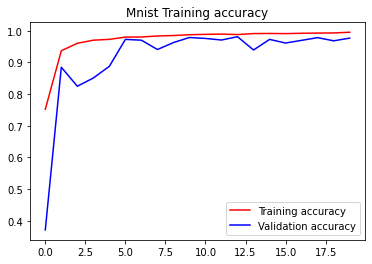

<Figure size 432x288 with 0 Axes>

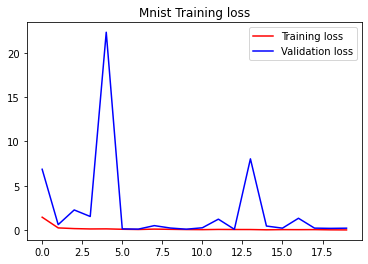

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Mnist Training accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Mnist Training loss")
plt.legend(loc=0)
plt.figure()
plt.show()

### 9.9 전이학습 - 이미 훈련된 모델을 고쳐 쓰기링

In [ ]:
# LAB9.3에서 데이터를 읽는 것까지는
# 그대로 진행한 뒤에 전이학습 코드를 새로 작성한다.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers 
from keras.models import Model, load_model 
import pandas as pd
from keras.optimizers import RMSprop

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[:10000] / 255.0, x_test[:2000] / 255.0
y_train, y_test = y_train[:10000], y_test[:2000]

x_train_preprocess = np.zeros((x_train.shape[0], 75, 75, 3), 
                              dtype=np.float32)
print(x_train_preprocess.shape)

for i, img in enumerate(x_train):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_train_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

x_test_preprocess = np.zeros((x_test.shape[0], 75, 75, 3), 
                             dtype=np.float32)
print(x_test_preprocess.shape)
# 검증 데이터 각각의 크기를 75x75로 변형 (인셉션모델 최소 입력 크기)
for i, img in enumerate(x_test):
    img_resize = resize(img, (75, 75), anti_aliasing=True)
    x_test_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])



(10000, 75, 75, 3)
(2000, 75, 75, 3)


In [ ]:
# 사전 훈련된 모델을 가져온다. - 이미지넷 데이터로 학습된 모델
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                              include_top=False,
                              weights='imagenet')

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(lr=0.0005),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_752 (Conv2D)             (None, 37, 37, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_752 (BatchN (None, 37, 37, 32)   96          conv2d_752[0][0]                 
__________________________________________________________________________________________________
activation_752 (Activation)     (None, 37, 37, 32)   0           batch_normalization_752[0][0]    
____________________________________________________________________________________________

In [ ]:
history = model.fit(x_train_preprocess, y_train, epochs=20, 
                    validation_data=(x_test_preprocess, y_test))

Epoch 1/20
313/313 [==============================] - 8s 18ms/step - loss: 0.5871 - accuracy: 0.8289 - val_loss: 0.1355 - val_accuracy: 0.9580
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.1035 - val_accuracy: 0.9680
Epoch 3/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0538 - accuracy: 0.9822 - val_loss: 0.1003 - val_accuracy: 0.9685
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0926 - val_accuracy: 0.9700
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0295 - accuracy: 0.9917 - val_loss: 0.0970 - val_accuracy: 0.9695
Epoch 6/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0193 - accuracy: 0.9949 - val_loss: 0.0781 - val_accuracy: 0.9770
Epoch 7/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.1291 - val_accuracy: 0.9635

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

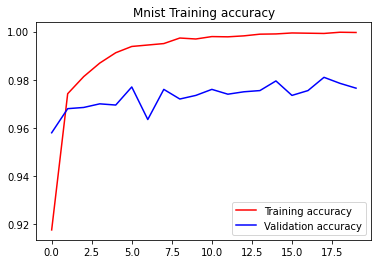

<Figure size 432x288 with 0 Axes>

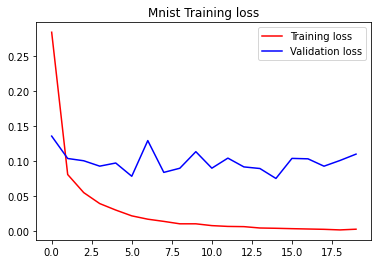

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Mnist Training accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Mnist Training loss")
plt.legend(loc=0)
plt.figure()
plt.show()

### 9장 미니 프로젝트 B2  얼굴 찾기 : CNN 활용하기


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다




In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

<Figure size 432x288 with 0 Axes>

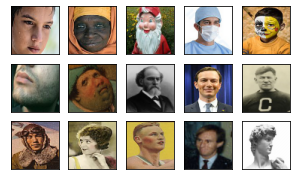

In [ ]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

<Figure size 432x288 with 0 Axes>

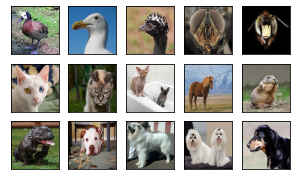

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [ ]:
X =face_images + animal_images
y = [ [1,0] ]* len(face_images) + [ [0,1]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 64, 64, 3) (30, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (64, 64, 3), 
                        kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 33s 33s/step - loss: 0.7523 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7792 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6744 - accuracy: 0.5667
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6669 - accuracy: 0.6333
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6534 - accuracy: 0.5667
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6429 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6219 - accuracy: 0.8000
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5960 - accuracy: 0.8333
Epoch 11/100
1/1 [=========

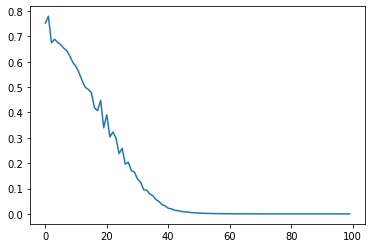

In [ ]:
plt.plot(history.history['loss'])

<Figure size 432x288 with 0 Axes>

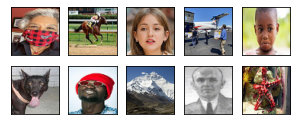

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

test_images = np.array(test_images)
plot_images(2, 5, test_images)

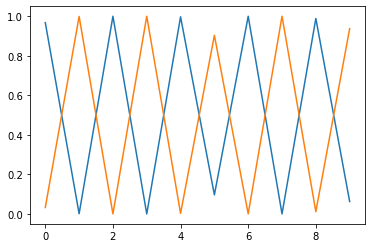

In [ ]:
test_result = model.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

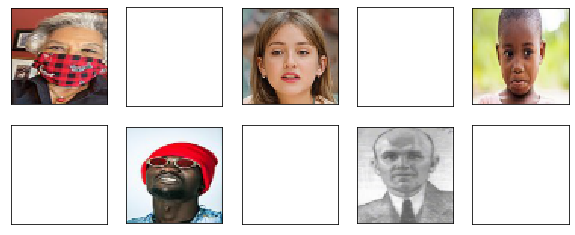

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j][0] > 0.5:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

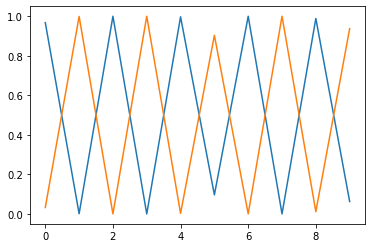

In [ ]:
test_result = model.predict(test_images)
plt.plot(test_result)

### 9장 미니 프로젝트 B3  얼굴 찾기 : 전이학습 활용하기


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers
from keras.models import Model

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

<Figure size 432x288 with 0 Axes>

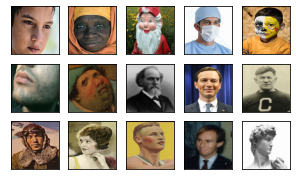

In [ ]:
face_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    face_images.append(img)

def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

<Figure size 432x288 with 0 Axes>

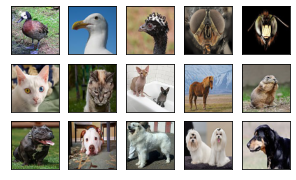

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [ ]:
X = face_images + animal_images
# 얼굴 이미지는 1, 얼굴이 아닌 이미지는 0 - sparse_categorical_entropy 
y = [[1]]* len(face_images) + [[0]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 75, 75, 3) (30, 1)


In [ ]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                                include_top=False,
                                weights=None)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_850 (Conv2D)             (None, 37, 37, 32)   864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_846 (BatchN (None, 37, 37, 32)   96          conv2d_850[0][0]                 
__________________________________________________________________________________________________
activation_846 (Activation)     (None, 37, 37, 32)   0           batch_normalization_846[0][0]    
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

In [ ]:
model = Model(pre_trained_model.input, my_layer)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_850 (Conv2D)             (None, 37, 37, 32)   864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_846 (BatchN (None, 37, 37, 32)   96          conv2d_850[0][0]                 
__________________________________________________________________________________________________
activation_846 (Activation)     (None, 37, 37, 32)   0           batch_normalization_846[0][0]    
___________________________________________________________________________________________

In [ ]:
history = model.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.3122 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 0.4966 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 0.4983 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 0.4960 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 0.4488 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2716 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.1026 - accuracy: 0.9333
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0406 - accuracy: 0.9667
Epoch 9/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0318 - accuracy: 0.9667
Epoch 10/100
1/1 [==============================] - 0s 49ms/step - loss: 5.2734e-04 - accuracy: 1.0000
Epoch 11/100
1/1 

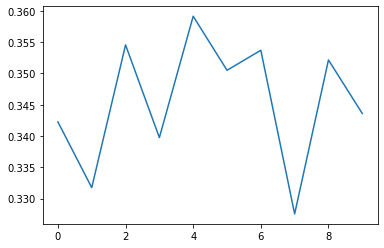

<Figure size 432x288 with 0 Axes>

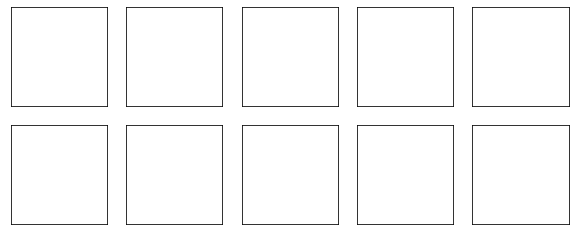

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []
for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    test_images.append(img)

test_images = np.array(test_images)
test_result = model.predict(test_images)
plt.plot(test_result)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [ ]:
frozen = InceptionV3(input_shape=(75, 75, 3),
                     include_top=False,
                     weights='imagenet')
last_layer = frozen.get_layer('mixed7')
last_output = last_layer.output

for layer in frozen.layers:
    layer.trainable = False

In [ ]:
my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(frozen.input, my_layer)
transfer_learner.summary()
transfer_learner.compile(optimizer='adam',
            loss='mse',
            metrics=['accuracy'])

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_944 (Conv2D)             (None, 37, 37, 32)   864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 37, 37, 32)   96          conv2d_944[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 37, 37, 32)   0           batch_normalization_940[0][0]    
___________________________________________________________________________________________

In [ ]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.2666 - accuracy: 0.5667
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0517 - accuracy: 0.9333
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 1.9464e-04 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 1.4599e-04 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 4.1950e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 4.4999e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 2.0034e-04 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 7.6538e-05 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 3.2449e-05 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 1.4442e-05 - accura

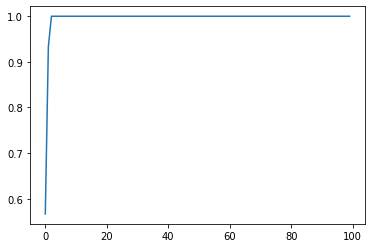

In [ ]:
plt.plot(history.history['accuracy'])

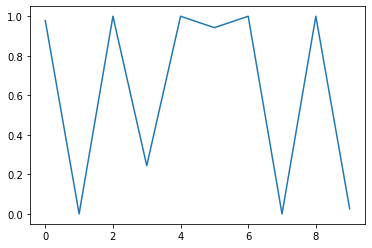

In [ ]:
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

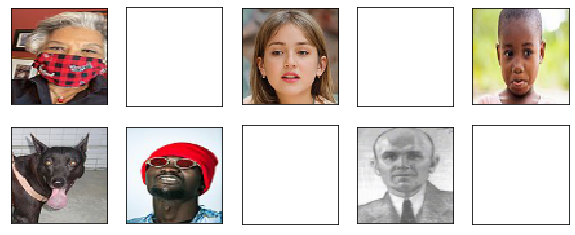

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [ ]:
from tensorflow.python.keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, 
              input_shape=(75, 75, 3))

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [ ]:
last_layer = vgg16.get_layer('block4_pool')
last_output = last_layer.output

for layer in vgg16.layers:
   layer.trainable = False

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(vgg16.input, my_layer)

transfer_learner.compile(optimizer='adam',
                         loss='mse',
                         metrics=['accuracy'])

In [ ]:
transfer_learner.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0  

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 0.3699 - accuracy: 0.4333
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0408 - accuracy: 0.9667
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0440 - accuracy: 0.9333
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 1.5588e-05 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 1.0948e-05 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 1.2891e-05 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 1.1276e-05 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 9.4365e-06 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 8.7541e-06 - accuracy: 1

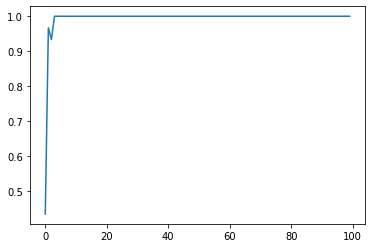

In [ ]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)
plt.plot(history.history['accuracy'])

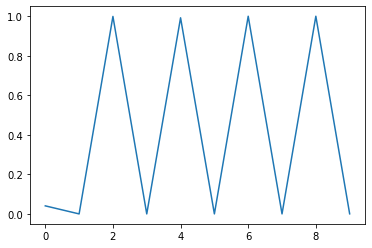

In [ ]:
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

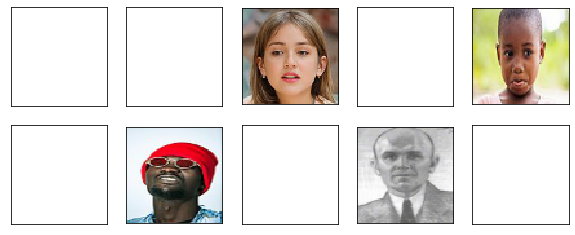

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')